In [1]:
import numpy as np
import matplotlib.pyplot as plt
import svm, optimization, oracles
import pickle
%matplotlib inline

from importlib import reload
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from time import time

In [2]:
import telepyth
%telepyth -t 15141875126559287112

Use token 15141875126559287112.


In [3]:
def generate_moons(random_state=120, samples=1000, features=500):
    X, y = make_moons(n_samples=samples, random_state=random_state, noise=0.05)
    #print(X.shape)
    np.random.seed(random_state)
    vector = np.random.random_sample((features - 2))
    lens = np.random.random_sample((samples)) - 0.5
    lens = lens * 10
    #print((vector[np.newaxis, :] * lens[:, np.newaxis]).shape)
    X = np.hstack((X, vector[np.newaxis, :] * lens[:, np.newaxis]))
    #print(X.shape)
    return X, y

In [4]:
X_moon, y_moon = generate_moons(120)

In [5]:
def generate_split(random_state=110, samples=1000, features=500):
    X, y = make_classification(n_classes=2, n_samples=samples, 
                                                         random_state=random_state, 
                                                         flip_y=0,
                                                         class_sep=5.0, shuffle=0.0, 
                                                         n_features=2, n_informative=2, n_redundant=0,)
    #print(X.shape)
    np.random.seed(random_state)
    vector = np.random.random_sample((features - 2))
    lens = np.random.random_sample((samples)) - 0.5
    lens = lens * 10
    #print((vector[np.newaxis, :] * lens[:, np.newaxis]).shape)
    X = np.hstack((X, vector[np.newaxis, :] * lens[:, np.newaxis]))
    #print(X.shape)
    return X, y

In [6]:
X_linear_split, y_linear_split = generate_split(110)

In [7]:
def generate_non_split(random_state=310, samples=1000, features=500):
    X, y = make_classification(n_classes=2, n_samples=samples, random_state=random_state,
                                                             class_sep=-1.0, shuffle=0.0,
                                                             n_features=2, n_informative=2, n_redundant=0)
    #print(X.shape)
    np.random.seed(random_state)
    vector = np.random.random_sample((features-2))
    lens = np.random.random_sample((samples)) - 0.5
    lens = lens * 10
    #print((vector[np.newaxis, :] * lens[:, np.newaxis]).shape)
    X = np.hstack((X, vector[np.newaxis, :] * lens[:, np.newaxis]))
    #print(X.shape)
    return X, y

In [8]:
X_non_split, y_non_split = generate_non_split(310)

In [9]:
def generate_outliers(random_state=75, samples=1000, features=500):
    X, y = make_classification(n_classes=2, n_samples=samples, random_state=random_state, flip_y=0.3,
                                               n_repeated=0,
                                               class_sep=5.0, shuffle=0.0,
                                               n_features=2, n_informative=2, n_redundant=0)
    #print(X.shape)
    np.random.seed(random_state)
    vector = np.random.random_sample((features - 2))
    lens = np.random.random_sample((samples)) - 0.5
    lens = lens * 10
    #print((vector[np.newaxis, :] * lens[:, np.newaxis]).shape)
    X = np.hstack((X, vector[np.newaxis, :] * lens[:, np.newaxis]))
    #print(X.shape)
    return X, y

In [10]:
X_outliers, y_outliers = generate_outliers(75)

In [11]:
def generate_imbalanced(random_state=37, samples=1000, features=500):
    X, y = make_classification(n_classes=2, n_samples=samples, random_state=random_state, weights=[0.1, 0.9],
                                               n_repeated=0, flip_y=0,
                                               class_sep=3, shuffle=0.0,
                                               n_features=2, n_informative=2, n_redundant=0)
    #print(X.shape)
    np.random.seed(random_state)
    vector = np.random.random_sample((features - 2))
    lens = np.random.random_sample((samples)) - 0.5
    lens = lens * 10
    #print((vector[np.newaxis, :] * lens[:, np.newaxis]).shape)
    X = np.hstack((X, vector[np.newaxis, :] * lens[:, np.newaxis]))
    #print(X.shape)
    return X, y

In [12]:
X_imbalanced, y_imbalanced = generate_imbalanced(37)

In [59]:
X, y = generate_non_split(samples=1000, features=2)
y[y == 0] = -1

In [60]:
X.shape, y.shape

((1000, 2), (1000,))

In [61]:
reload(svm)
optimization = reload(optimization)

In [66]:
X_s = X + 2

In [67]:
X_s.shape

(1000, 2)

[ 3.70915431]
0.932


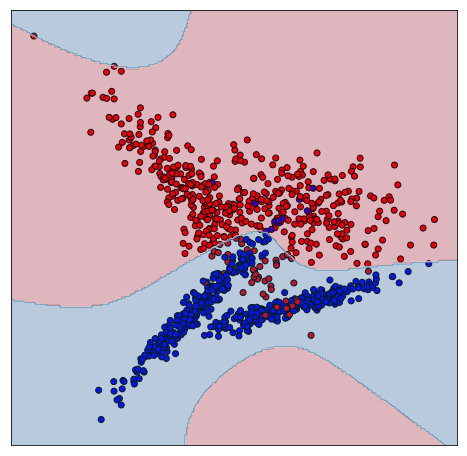

In [68]:
gamma = 7
degree = 5
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(8, 8))
plt.scatter(X_s[:, 0], X_s[:, 1], c=y, cmap=cm_bright, 
               edgecolors='k')
#clf = svm.SVMSolver(method='primal', kernel='rbf')
clf = svm.SVMSolver(method='dual', kernel='polynomial', degree=degree, C=50)
#clf = svm.SVMSolver(method='dual', kernel='rbf', gamma=gamma, C=50)
clf.fit(X_s, y)
print(clf.w_0)
mask = clf.dual > 0.01
#print(clf.dual)
#plt.scatter(X[mask, 0], X[mask, 1], c=y[mask], s=80, cmap=cm_bright, 
#               edgecolors='k')
y_pred = clf.predict(X_s)
print((y_pred == y).mean())

h=0.03
x_min, x_max = X_s[:, 0].min() - .5, X_s[:, 0].max() + .5
y_min, y_max = X_s[:, 1].min() - .5, X_s[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#print([x for x in Z if x == -1])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.xticks(())
plt.yticks(())
plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
#plt.savefig('./pict/nonsplit_rbf_{0}.pdf'.format(gamma), bbox_inches='tight')

In [19]:
clf.dual

array([  1.05480561e-05,   1.21841647e-05,   8.64516058e-06,
         1.44920105e-05,   2.63571453e-05,   2.50737890e-05,
         1.89775830e-04,   1.13780021e-05,   1.45568886e+00,
         2.09301244e-04,   1.77572117e-05,   1.03669800e-01,
         2.90388601e-04,   6.85767617e+00,   1.65125395e-05,
         1.24966296e-01,   2.96825880e+00,   7.50835084e+00,
         1.24896530e-05,   1.73063941e+00,   1.29944178e+00,
         6.08548368e+00,   5.07005521e-01,   1.10483904e-05,
         1.76640330e-02,   1.87647248e-01,   1.94753471e-01,
         7.19872781e-06,   3.88029877e-05,   4.35983211e-01,
         1.21074075e+00,   1.71584256e-05,   3.21690789e-05,
         5.90975245e+00,   1.41044034e-04,   1.64686855e-05,
         5.57719442e-06,   5.27227871e-05,   4.01667138e-05,
         9.29025860e-06,   3.29043559e-01,   4.64453868e-01,
         9.34423392e-05,   1.16606287e-01,   1.04296418e-04,
         1.59285536e-05,   1.15118615e-04,   3.09304569e-01,
         7.39006185e-06,

0.896


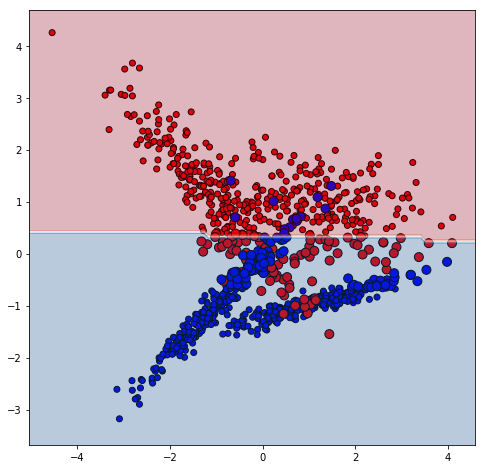

In [18]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, 
               edgecolors='k')
clf = svm.SVMSolver(method='dual', kernel='linear', C=1000)
#clf = svm.SVMSolver(method='dual', kernel='rbf', gamma=1000.0)
clf.fit(X, y)
mask = clf.dual > 1e-3
#print(clf.dual)
#print(clf.dual)
plt.scatter(X[mask, 0], X[mask, 1], c=y[mask], s=80, cmap=cm_bright, 
               edgecolors='k')
y_pred = clf.predict(X)
print((y_pred == y).mean())

h=0.09
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#print([x for x in Z if x == -1])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)


In [8]:
optimization = reload(optimization)

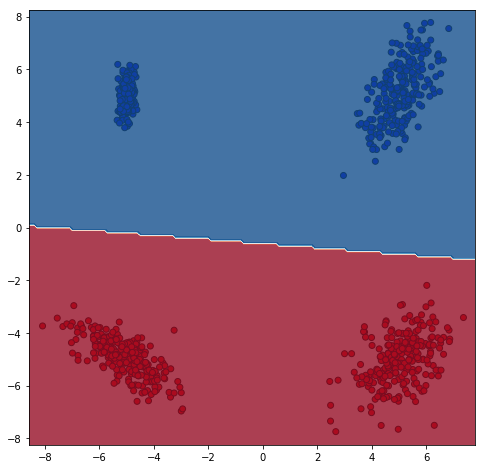

In [24]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(8, 8))
X_ones = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, 
               edgecolors='k')
clf = optimization.SubGDClassifier(batch_size=100, step_beta=0.01)
y[y == 0] = -1
clf.fit(X_ones, y)
h=0.1
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
tmp = np.c_[xx.ravel(), yy.ravel()]
tmp = np.hstack((np.ones(tmp.shape[0])[:, np.newaxis], tmp))
Z = clf.predict(tmp)
#print([x for x in Z if x == -1])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)


In [32]:
Z

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [ ]:
clf = svm.SVMSolver(method='primal')
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)


In [67]:
svm = reload(svm)
optimization = reload(optimization)

classifiers = [
    svm.SVMSolver(method='primal'),
    svm.SVMSolver(method='dual'),
    svm.SVMSolver(method='dual', kernel='rbf'),
    svm.SVMSolver(method='dual', kernel='polynomial'),
    optimization.SubGDClassifier(max_iter=10000, step_beta=1),
    optimization.SSubGDClassifier(max_iter=10000, step_beta=1, batch_size=100),
    optimization.PEGASOSMethod(max_iter=10000, batch_size=100),
]

In [26]:
data_list = [
    (X_linear_split, y_linear_split),
    (X_moon, y_moon),
    (X_non_split, y_non_split),
    (X_outliers, y_outliers),
    (X_imbalanced, y_imbalanced)
]
for X, y in data_list:
    print(X.shape, y.shape)

(1000, 500) (1000,)
(1000, 500) (1000,)
(1000, 500) (1000,)
(1000, 500) (1000,)
(1000, 500) (1000,)


In [27]:
print(' '.join([str(x) + ' &' for x in [500, 1000, 1500, 2000]]), "\\\ ")
for clf in classifiers:
    print(str(clf).split('.')[-1].split(' ')[0], '&', end=' ')
    for samples in [500, 1000, 1500, 2000]:
        X, y = generate_non_split(samples=samples)
        y[y == 0] = -1
        #print(X.shape)
        time_start = time()
        clf.fit(X, y)
        print('{0:.1f}'.format(time() - time_start), '&', end=' ')
    print('\\\ ')

500 & 1000 & 1500 & 2000 & \\ 
SVMSolver & 0.8 & 2.1 & 4.5 & 10.3 & \\ 
SVMSolver & 0.2 & 1.2 & 2.9 & 6.7 & \\ 
SVMSolver & 0.3 & 1.4 & 2.2 & 5.2 & \\ 
SVMSolver & 0.4 & 1.8 & 4.4 & 9.8 & \\ 
SubGDClassifier & 7.4 & 25.7 & 39.4 & 62.0 & \\ 
SSubGDClassifier & 7.1 & 13.5 & 18.0 & 22.4 & \\ 
PEGASOSMethod & 5.2 & 12.9 & 19.1 & 20.9 & \\ 


In [28]:
print(' '.join([str(x) + ' &' for x in [100, 500, 1000, 1500]]), "\\\ ")
for clf in classifiers:
    print(str(clf).split('.')[-1].split(' ')[0], '&', end=' ')
    for features in [100, 500, 1000, 1500]:
        X, y = generate_split(samples=1000, features=features)
        y[y == 0] = -1
        #print(X.shape)
        time_start = time()
        clf.fit(X, y)
        print('{0:.1f}'.format(time() - time_start), '&', end=' ')
    print('\\\ ')

100 & 500 & 1000 & 1500 & \\ 
SVMSolver & 2.0 & 3.1 & 5.1 & 9.0 & \\ 
SVMSolver & 1.5 & 1.6 & 1.6 & 1.5 & \\ 
SVMSolver & 0.8 & 0.9 & 1.5 & 1.6 & \\ 
SVMSolver & 1.9 & 2.0 & 2.0 & 2.0 & \\ 
SubGDClassifier & 2.0 & 11.6 & 24.3 & 44.6 & \\ 
SSubGDClassifier & 3.0 & 13.9 & 23.3 & 37.3 & \\ 
PEGASOSMethod & 2.2 & 12.5 & 26.8 & 37.7 & \\ 


In [34]:
func = oracles.BinaryHinge().func
for i in range(len(classifiers)):
    clf = classifiers[i]
    print(str(clf).split('.')[-1].split(' ')[0], '&', end=' ')
    for samples in [1000]:
        X, y = generate_non_split(samples=samples, features=2)
        y[y == 0] = -1
        X_ones = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
        if i > 3:
            clf.fit(X_ones, y)
            y_pred = clf.predict(X_ones)
            print('{0:.2f}'.format(func(X_ones, y, clf.w)), '&', end=' ')
        elif i == 0:
            clf.fit(X, y)
            #print(clf.w_0, clf.w)
            print('{0:.2f}'.format(clf.compute_primal_objective(X=X, y=y)), '&', end=' ')
        else:
            clf.fit(X, y)
            #print(clf.w_0, clf.w)
            print('{0:.2f}'.format(clf.compute_dual_objective(X=X, y=y)), '&', end=' ')
    print('\\\ ')

SVMSolver & 0.62 & \\ 
SVMSolver & -0.62 & \\ 
SVMSolver & -0.98 & \\ 
SVMSolver & -0.33 & \\ 
SubGDClassifier & 0.62 & \\ 
SSubGDClassifier & 0.62 & \\ 
PEGASOSMethod & 0.62 & \\ 


In [68]:
optimization = reload(optimization)

for i in range(len(classifiers)):
    clf = classifiers[i]
    print(str(clf).split('.')[-1].split(' ')[0], '&', end=' ')
    for X, y in data_list:
        y[y == 0] = -1
        if i > 3:
            X_ones = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
            clf.fit(X_ones, y)
            #plt.plot(his['func'])
            #plt.show()
            y_pred = clf.predict(X_ones)
            print ('{0:.3f}'.format((y_pred == y).mean()), '&', end=' ')
        else:
            clf.fit(X, y)
            y_pred = clf.predict(X)
            print ('{0:.3f}'.format((y_pred == y).mean()), '&', end=' ')
    print('\\\ ')

SVMSolver & 1.000 & 0.796 & 0.910 & 0.857 & 1.000 & \\ 
SVMSolver & 1.000 & 0.783 & 0.842 & 0.857 & 1.000 & \\ 
SVMSolver & 1.000 & 0.988 & 0.994 & 0.983 & 1.000 & \\ 
SVMSolver & 1.000 & 0.873 & 0.924 & 0.857 & 1.000 & \\ 
SubGDClassifier & 1.000 & 0.798 & 0.916 & 0.857 & 0.931 & \\ 
SSubGDClassifier & 1.000 & 0.796 & 0.908 & 0.857 & 0.970 & \\ 
PEGASOSMethod & 1.000 & 0.799 & 0.924 & 0.857 & 1.000 & \\ 


In [39]:
clf = classifiers[4]
print(clf)
X, y = generate_non_split()
X_ones = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
y[y == 0] = -1
history = clf.fit(X, y, trace=True)

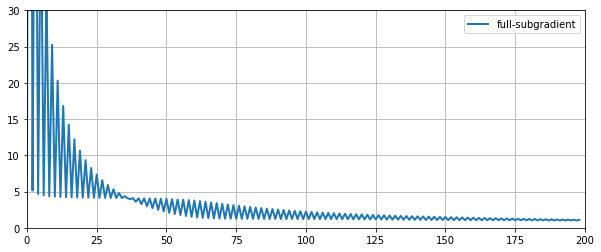

In [42]:
clf = classifiers[5]
clf2 = classifiers[6]
X, y = generate_non_split()
X_ones = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
y[y == 0] = -1
history1 = clf.fit(X, y, trace=True)
history2 = clf2.fit(X, y, trace=True)

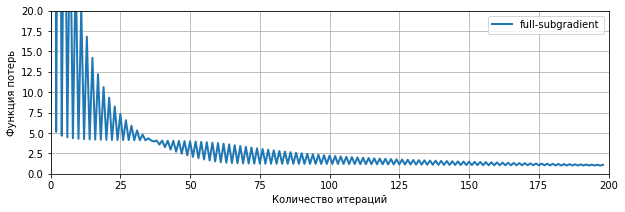

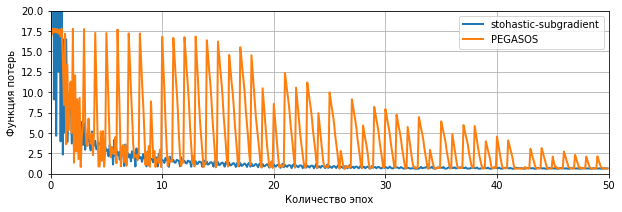

In [64]:
plt.figure(figsize=(10, 3))
plt.plot(history['func'][1:200], linewidth=2, label='full-subgradient')
plt.grid()
plt.xlabel('Количество итераций')
plt.ylabel('Функция потерь')
plt.ylim(0, 20)
plt.xlim(0, 200)
plt.legend()
plt.savefig('./pict/fs.pdf', bbox_inches='tight')
plt.show()
plt.figure(figsize=(10, 3))
plt.plot(history1['epoch_num'][1:500], history1['func'][1:500], label='stohastic-subgradient',
        linewidth=2)
plt.plot(history2['epoch_num'][1:500], history2['func'][1:500], label='PEGASOS', linewidth=2)
plt.legend()
plt.xlabel('Количество эпох')
plt.ylabel('Функция потерь')
plt.ylim(0, 20)
plt.xlim(0, 50)
plt.grid()
plt.savefig('./pict/ss.pdf', bbox_inches='tight')
plt.show()

In [166]:
%telepyth 'accuracy finished'

'accuracy finished'

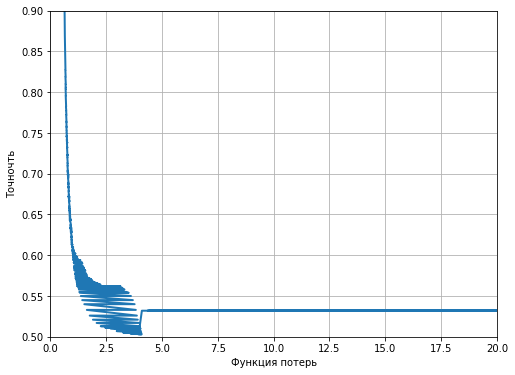

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(history['func'][1:], history['accuracy'][1:], linewidth=2)
plt.xlim(0, 20)
plt.ylim(0.5, 0.9)
plt.ylabel('Точночть')
plt.xlabel('Функция потерь')
plt.grid()
plt.savefig('./pict/acc-func.pdf', bbox_inches='tight')
plt.show()

7
SubGDClassifier


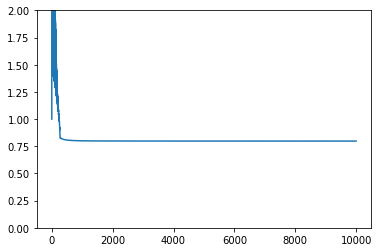

SSubGDClassifier


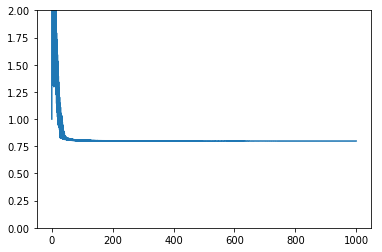

PEGASOSMethod


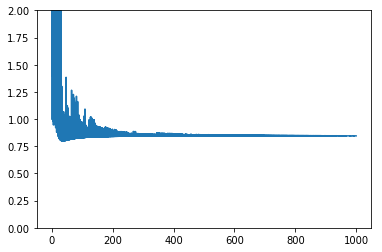

In [183]:
print(len(classifiers))
for i in range(4, len(classifiers)):
    clf = classifiers[i]
    print(str(clf).split('.')[-1].split(' ')[0])
    X, y = data_list[1]
    y[y == 0] = -1
    X_ones = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
    history = clf.fit(X_ones, y, trace=True)
    if i == 4:
        plt.plot(history['func'][:])
    else:
        plt.plot(history['epoch_num'], history['func'][:])
    plt.ylim(0.0, 2.0)
    plt.show()

In [81]:
from sklearn.cross_validation import KFold

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [89]:
X, y = generate_non_split()
y[y == 0] = -1

In [90]:
kf = KFold(n=1000, n_folds=5, shuffle=True, random_state=100)
res = {}
for C in [1, 5, 10, 25, 50, 100]:
    clf = svm.SVMSolver(method='dual', C=C)
    scores = []
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append((y_pred == y_test).mean())
    res[C] = np.array(scores).mean()
res = sorted(res.items())

In [91]:
with open('./mem/c_find', 'wb') as f:
    pickle.dump(res, f)


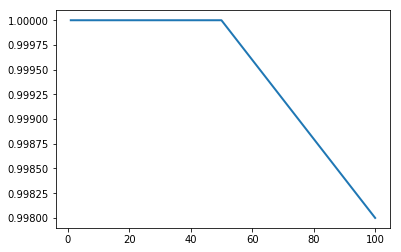

1 & 5 & 10 & 25 & 50 & 100 & 
1.000 & 1.000 & 1.000 & 1.000 & 1.000 & 0.998 & 

In [93]:
with open('./mem/c_find', 'rb') as f:
    res = pickle.load(f)
plt.plot([x[0] for x in res], [x[1] for x in res], linewidth=2)
plt.show()
for c, acc in sorted(res):
    print(c, '&', end=' ')
print()
for c, acc in sorted(res):
    print('{0:.3f}'.format(acc), '&', end=' ')

In [99]:
X, y = X_non_split, y_non_split
y[y == 0] = -1

In [100]:
kf = KFold(n=1000, n_folds=5, shuffle=True, random_state=100)
res = {}
for gamma in [1, 5, 10, 15]:
    clf = svm.SVMSolver(method='dual', kernel='rbf', gamma=gamma, C=50)
    scores = []
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append((y_pred == y_test).mean())
    res[gamma] = np.array(scores).mean()

In [101]:
res = sorted(res.items())
with open('./mem/gamma_find', 'wb') as f:
    pickle.dump(res, f)


1 & 5 & 10 & 15 & 
0.876 & 0.877 & 0.873 & 0.870 & 

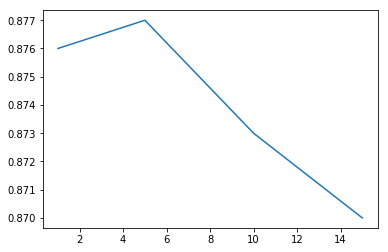

In [102]:
with open('./mem/gamma_find', 'rb') as f:
    res = pickle.load(f)
plt.plot([x[0] for x in res], [x[1] for x in res])
for gamma, acc in sorted(res):
    print(gamma, '&', end=' ')
print()
for gamma, acc in sorted(res):
    print('{0:.3f}'.format(acc), '&', end=' ')

In [108]:
X, y = generate_non_split(samples=1000, features=2)
y[y == 0] = -1

In [112]:
kf = KFold(n=1000, n_folds=5, shuffle=True, random_state=100)
res = {}
for d in [1, 2, 3, 4, 5]:
    clf = svm.SVMSolver(method='dual', kernel='polynomial', degree=d, C=50)
    scores = []
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append((y_pred == y_test).mean())
    res[d] = np.array(scores).mean()


In [113]:
res = sorted(res.items())
with open('./mem/degree_find', 'wb') as f:
    pickle.dump(res, f)

1 & 2 & 3 & 4 & 5 & 
0.925 & 0.921 & 0.937 & 0.935 & 0.935 & 

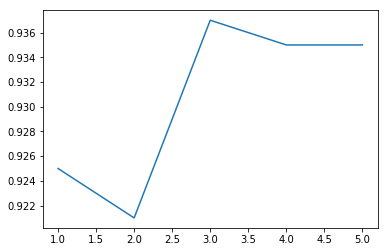

In [116]:
with open('./mem/degree_find', 'rb') as f:
    res = pickle.load(f)
plt.plot([x[0] for x in res], [x[1] for x in res])
for gamma, acc in sorted(res):
    print(gamma, '&', end=' ')
print()
for gamma, acc in sorted(res):
    print('{0:.3f}'.format(acc), '&', end=' ')

In [132]:
X, y = generate_moons(samples=1000, features=2)
y[y == 0] = -1
X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))

In [133]:
kf = KFold(n=1000, n_folds=5, shuffle=True, random_state=100)
res = {}
for beta in [0, 0.1, 1, 1.5, 2]:
    clf = optimization.SSubGDClassifier(batch_size=100, max_iter=5000, step_beta=beta, C=50)
    scores = []
    average = np.zeros(history['accuracy'].shape[0])
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        history = clf.fit(X_train, y_train, trace=True, log_freq=0.1)
        
        average += history['accuracy']
        y_pred = clf.predict(X_test)
        scores.append((y_pred == y_test).mean())
    res[beta] = np.array(scores).mean()
    with open('./mem/beta_find_ind'.format(beta), 'wb') as f:
        pickle.dump(history['epoch_num'], f)
    with open('./mem/av_find_{0}'.format(beta), 'wb') as f:
        pickle.dump(average, f)

In [147]:
clf = optimization.PEGASOSMethod(batch_size=100, max_iter=5000, step_lambda=1.0 / 50)
scores = []
average = np.zeros(history['accuracy'].shape[0])
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    history = clf.fit(X_train, y_train, trace=True, log_freq=0.1)
    
    average += history['accuracy']
    y_pred = clf.predict(X_test)
    scores.append((y_pred == y_test).mean())
print('PEGASOS mean:', np.array(scores).mean())
with open('./mem/peg_ind'.format(beta), 'wb') as f:
    pickle.dump(history['epoch_num'], f)
with open('./mem/peg'.format(beta), 'wb') as f:
    pickle.dump(average, f)

PEGASOS mean: 0.87


In [135]:
res = sorted(res.items())
with open('./mem/beta_find', 'wb') as f:
    pickle.dump(res, f)

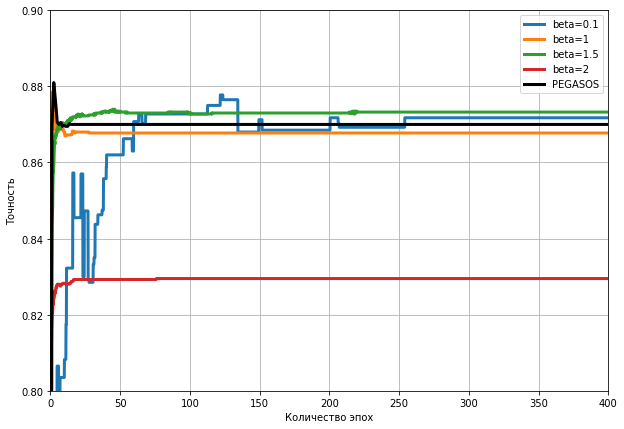

In [158]:
plt.figure(figsize=(10, 7))
for beta in [0.1, 1, 1.5, 2]:
    with open('./mem/beta_find_ind'.format(beta), 'rb') as f:
        ind = pickle.load(f)
    with open('./mem/av_find_{0}'.format(beta), 'rb') as f:
        values = pickle.load(f)
    plt.plot(ind, values / 5.0, label='beta={0}'.format(beta), linewidth=3)
with open('./mem/peg_ind'.format(beta), 'rb') as f:
    ind = pickle.load(f)
with open('./mem/peg', 'rb') as f:
    values = pickle.load(f) / 5.0
plt.plot(ind[::10], values[::10], label='PEGASOS'.format(beta), color='black', linewidth=3)
plt.grid()
plt.legend()
plt.xlabel('Количество эпох')
plt.ylabel('Точность')
plt.xlim(0, 400)
plt.ylim(0.8, 0.9)
plt.savefig('./pict/beta.pdf', bbox_inches='tight')
plt.show()

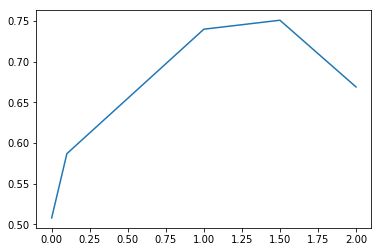

In [256]:
with open('./mem/beta_find', 'rb') as f:
    res = pickle.load(f)
plt.plot([x[0] for x in res], [x[1] for x in res])

In [143]:
kf = KFold(n=1000, n_folds=5, shuffle=True, random_state=100)
res = {}
for batch_size in [1, 10, 50, 100, 200]:
    clf = optimization.SSubGDClassifier(batch_size=batch_size, max_iter=5000, step_beta=0.1, C=50)
    scores = []
    average = 0
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        history = clf.fit(X_train, y_train, trace=True, log_freq=0.1)
        
        average = average + history['accuracy']
        y_pred = clf.predict(X_test)
        scores.append((y_pred == y_test).mean())
    res[batch_size] = np.array(scores).mean()
    with open('./mem/bs_find_ind_{0}'.format(batch_size), 'wb') as f:
        pickle.dump(history['epoch_num'], f)
    with open('./mem/bs_av_find_{0}'.format(batch_size), 'wb') as f:
        pickle.dump(average, f)

In [151]:
clf = svm.SVMSolver(method='dual', C=50.0)
scores = []
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    scores.append((y_pred == y_test).mean())
print('SVM mean: {0:.3f}'.format(np.array(scores).mean()))

SVM mean: 0.870


In [144]:
res = sorted(res.items())
with open('./mem/bs_find', 'wb') as f:
    pickle.dump(res, f)

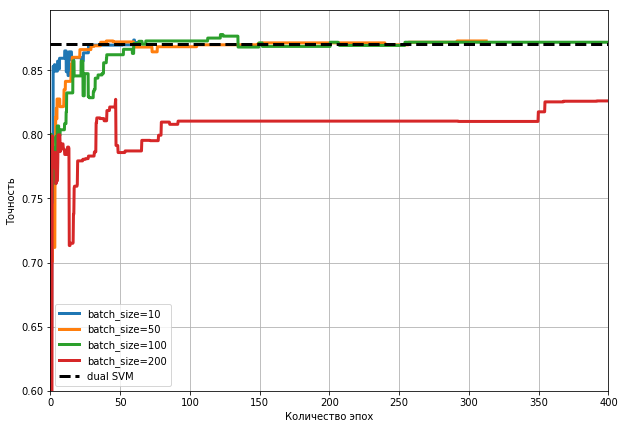

In [159]:
plt.figure(figsize=(10, 7))
for batch_size in [10, 50, 100, 200]:
    with open('./mem/bs_find_ind_{0}'.format(batch_size), 'rb') as f:
        ind = pickle.load(f)
    with open('./mem/bs_av_find_{0}'.format(batch_size), 'rb') as f:
        values = pickle.load(f)
    plt.plot(ind, values / 5.0, label='batch_size={0}'.format(batch_size), linewidth=3)
plt.plot([0, 400], [0.87, 0.87], color='k', linewidth=3, linestyle='--', label='dual SVM')
plt.grid()
plt.legend()
plt.ylim(0.6)
plt.xlim(0, 400)
plt.ylabel('Точность')
plt.xlabel('Количество эпох')
plt.savefig('./pict/bs.pdf', bbox_inches='tight')
plt.show()

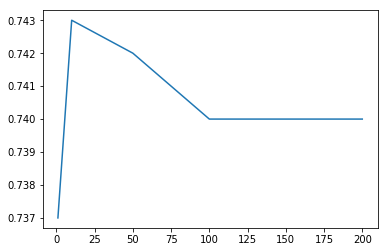

In [296]:
with open('./mem/bs_find', 'rb') as f:
    res = pickle.load(f)
plt.plot([x[0] for x in res], [x[1] for x in res])

In [291]:
%telepyth 'batch size finished'

'batch size finished'